# Ridge Regression from Scratch

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
  
# Ridge Regression
  
class RidgeRegression() :
      
    def __init__( self, learning_rate, iterations, l2_penality ) :
          
        self.learning_rate = learning_rate        
        self.iterations = iterations        
        self.l2_penality = l2_penality
          
    # Function for model training            
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape
          
        # weight initialization        
        self.W = np.zeros( self.n )
          
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :           
        Y_pred = self.predict( self.X )
          
        # calculate gradients      
        dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) +               
               ( 2 * self.l2_penality * self.W ) ) / self.m     
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db        
        return self
    
    # Hypothetical function  h( x ) 
    def predict( self, X ) :    
        return X.dot( self.W ) + self.b


Predicted values  [ 40831.44 122898.14  65078.42]
Real values       [ 37731. 122391.  57081.]
Trained W         9325.76
Trained b         26842.8


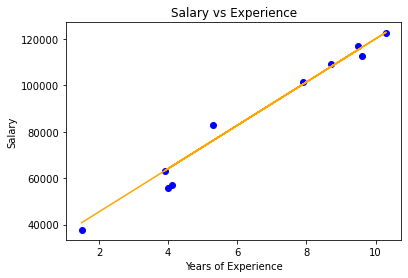

In [7]:
# Driver code
  
def main() :
      
    # Importing dataset    
    df = pd.read_csv( "salary_data.csv" )
    X = df.iloc[:, :-1].values
    Y = df.iloc[:, 1].values    
  
    # Splitting dataset into train and test set
    X_train, X_test, Y_train, Y_test = train_test_split( X, Y, 
                                            
                                          test_size = 1 / 3, random_state = 0 )
      
    # Model training    
    model = RidgeRegression( iterations = 1000,                             
                            learning_rate = 0.01, l2_penality = 1 )
    model.fit( X_train, Y_train )
      
    # Prediction on test set
    Y_pred = model.predict( X_test )    
    print( "Predicted values ", np.round( Y_pred[:3], 2 ) )     
    print( "Real values      ", Y_test[:3] )    
    print( "Trained W        ", round( model.W[0], 2 ) )    
    print( "Trained b        ", round( model.b, 2 ) )
      
    # Visualization on test set     
    plt.scatter( X_test, Y_test, color = 'blue' )    
    plt.plot( X_test, Y_pred, color = 'orange' )    
    plt.title( 'Salary vs Experience' )    
    plt.xlabel( 'Years of Experience' )    
    plt.ylabel( 'Salary' )    
    plt.show()
    
    
if __name__ == "__main__" : 
    main()
    
    
    

# Linear regression : Elastic Net Regression

In [1]:
# load and summarize the housing dataset
from pandas import read_csv
from matplotlib import pyplot
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
# summarize shape
print(dataframe.shape)
# summarize first few lines
print(dataframe.head())

(506, 14)
        0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [5]:
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
print('X shape :', X.shape)
print('Y shape :', y.shape)

X shape : (506, 13)
Y shape : (506,)


### Define the model...

In [6]:
# define model
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=1.0, l1_ratio=0.5)

In [7]:
# fit model
model.fit(X, y)
# define new data
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
# make a prediction
yhat = model.predict([row])
# summarize prediction
print('Predicted: %.3f' % yhat)

Predicted: 31.047


In [8]:
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# define model
model = ElasticNet()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -3.378
Config: {'alpha': 0.01, 'l1_ratio': 0.97}


In [3]:

# use automatically configured elastic net algorithm
from numpy import arange
from pandas import read_csv
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import RepeatedKFold
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
ratios = arange(0, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1)
# fit model
model.fit(X, y)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)
print('l1_ratio_: %f' % model.l1_ratio_)

/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/l

/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5003.353967288182, tolerance: 3.7929101450549454
  mod

/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5245.08587182621, tolerance: 3.8665083516483523
  mode

/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4613.393614627341, tolerance: 3.7803832894736846
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/l

/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4748.899934575311, tolerance: 3.9281246228070175
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5211.336901122304, tolerance: 3.966417945175437
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4748.899934575355, tolerance: 3.9281246228070175
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5033.999883655248, tolerance: 3.7981172879120875
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  mod

/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4653.826260693659, tolerance: 3.587134936263736
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  mode

/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5003.3539672882325, tolerance: 3.7929101450549454
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  mo

/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5211.336901122173, tolerance: 3.966417945175437
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5125.721436586937, tolerance: 3.89033465934066
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with 

/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5152.650286426353, tolerance: 3.9961889451754375
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  mod

/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5199.897867372616, tolerance: 4.005465749450549
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4653.826260693626, tolerance: 3.587134936263736
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with

/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5109.406543411598, tolerance: 3.9622208219780224
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4824.1185801470565, tolerance: 3.8953458925438604
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5003.353967288211, tolerance: 3.7929101450549454
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_

/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4820.641174975437, tolerance: 3.766251745054944
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5211.336901122329, tolerance: 3.966417945175437
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did no

/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4938.326038547875, tolerance: 3.7370255692307692
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5245.085871826348, tolerance: 3.8665083516483523
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent wi

/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5245.0858718263735, tolerance: 3.8665083516483523
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5152.6502864264185, tolerance: 3.9961889451754375
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective di

/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4758.911576524417, tolerance: 3.783493437362637
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5042.312198197837, tolerance: 3.7652059648351637
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did n

/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4533.3892659620615, tolerance: 3.742845230769231
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  mod

/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4938.326038547861, tolerance: 3.7370255692307692
  mod

/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4758.9115765244205, tolerance: 3.783493437362637
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  mod

/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5102.069941107387, tolerance: 3.92876058021978
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4359.41169348589, tolerance: 3.8221698593406606
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with 

/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5152.650286426411, tolerance: 3.9961889451754375
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5246.023402267769, tolerance: 3.9532313662280716
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5211.336901122158, tolerance: 3.966417945175437
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5246.023402267696, tolerance: 3.9532313662280716
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent wit

/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5109.406543411591, tolerance: 3.9622208219780224
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  mod

alpha: 0.000000
l1_ratio_: 0.920000


/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4703.960334103929, tolerance: 3.701088938596491
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5308.605854251917, tolerance: 3.8821705054945044
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5102.069941107475, tolerance: 3.92876058021978
  model = cd_fast.enet_coordinate_descent_gram(
/Users/malom/anaconda3/lib/python3.8/site-packages/sklearn/linear_mode

In [4]:
from sklearn.linear_model import ElasticNetCV
from sklearn.datasets import make_regression

X, y = make_regression(n_features=2, random_state=0)
regr = ElasticNetCV(cv=5, random_state=0)
regr.fit(X, y)
ElasticNetCV(cv=5, random_state=0)
print(regr.alpha_)
print(regr.intercept_)
print(regr.predict([[0, 0]]))

0.1994727942696716
0.3988829654276791
[0.39888297]


In [5]:
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy as np

y_pred = regr.predict(X)
print(y_pred.shape)

print('Mean Absulute Error (MAE) :',metrics.mean_absolute_error(y,y_pred))
print('Mean Squared Error (MSE) :',metrics.mean_squared_error(y,y_pred))
print('Root Mean Squared Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y,y_pred)))

r2_squared = r2_score(y,y_pred)
print('R2-score :', r2_squared)

(100,)
Mean Absulute Error (MAE) : 7.438694989855603
Mean Squared Error (MSE) : 83.24865699978307
Root Mean Squared Error (RMSE) : 9.124070199191975
R2-score : 0.9919989267248278
